In [ ]:
# 다음 단어 예측. 예를 들어 '반짝 반짝 작은별'이 있을 때 '반짝', '반짝'은 X로, '작은별'은 Y로 모델에 넣는다. 그럼 규칙을 찾겠지?
# 근데 여기서 Y를 원-핫-인코딩 처리한다. 즉, [0,0,0,0,.....1,0,0,0,0,0,0,...]로 만든다는 것. 토커나이저에 입력하는 단어가 진짜 많은데 그 크기만큼 리스트를 만든다는게 음...너무 연산속도에 부담이 갈거 같다. 
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# 입력 데이터
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# 다 소문자로 만들어버린 다음 줄바꿈 단위마다 문장을 나눠 리스트에 넣는다. 
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus) # 리스트를 이용해 토커나이저 생성
total_words = len(tokenizer.word_index) + 1 # 토커나이저에 없는 단어(outer of vocabulary)를 생각해 1을 더했다. 

print(tokenizer.word_index) # 토커나이저 출력
print(total_words) # 총 단어 개수


{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [8]:
input_sequences = [] 
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	#print(tokenizer.texts_to_sequences([line]))
	#print(token_list) # tokenizer.texts_to_sequences([line])[0]이 시퀀스였다. 근데 tokenizer.texts_to_sequences([line])가 빈 껍데기였다. 뭐지? 
	# [[4, 2, 66, 8, 67, 68, 69, 70]] : tokenizer.texts_to_sequences([line])
	# [4, 2, 66, 8, 67, 68, 69, 70] : tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)): # 시퀀스 안의 토큰 하나씩 꺼내기
		n_gram_sequence = token_list[:i+1] # 피라미드? 개념으로 [4,2], [4,2,66], [4,2,66,8]...를 계속 생산
		input_sequences.append(n_gram_sequence) # 만든걸 더해줌
print(input_sequences) # 모든 문장에 대한 [4,2], [4,2,66], [4,2,66,8]...이 다 들어있다. 연산능력 믿고 다 때려넣었구나...하는 생각이 든다.
# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences]) # 최대 길이 구하기. 왜냐하면 최대 길이 기준으로 패딩을 할 것이기 때문.
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')) # 다 패딩처리 해준다. 앞에 0이 있는게 연산에 더 편하기 때문에 패딩 모드를 pre로 해준다. 

# create predictors and label
xs, labels = input_sequences[:,:-1],input_sequences[:,-1] # 입력값 구하기. [0 0 0 0 0 0 0 4 2]가 있을 때 [0 0 0 0 0 0 0 4]를 입력, [2]를 출력으로 한다. 파이썬의 성질 덕분에 이렇게 코드 한 줄로 쉽게 만들 수 있다. 

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words) # 출력값. 앞서 구한 label(마지막 인덱스에 대한 값)을 원-핫-인코딩으로 만든다. MNIST생각하면 된다. 답이 하나밖에 없어 MNIST처리하듯 처리하면 된다. 문제는 분류할 클래스 개수가 너무 많다는거다. 이래도 괜찮나...?

[[4, 2], [4, 2, 66], [4, 2, 66, 8], [4, 2, 66, 8, 67], [4, 2, 66, 8, 67, 68], [4, 2, 66, 8, 67, 68, 69], [4, 2, 66, 8, 67, 68, 69, 70], [71, 40], [71, 40, 20], [71, 40, 20, 21], [71, 40, 20, 21, 72], [71, 40, 20, 21, 72, 3], [71, 40, 20, 21, 72, 3, 73], [16, 74], [16, 74, 75], [16, 74, 75, 1], [16, 74, 75, 1, 76], [16, 74, 75, 1, 76, 33], [16, 74, 75, 1, 76, 33, 3], [16, 74, 75, 1, 76, 33, 3, 77], [16, 74, 75, 1, 76, 33, 3, 77, 22], [41, 33], [41, 33, 3], [41, 33, 3, 78], [41, 33, 3, 78, 1], [41, 33, 3, 78, 1, 79], [41, 33, 3, 78, 1, 79, 80], [41, 33, 3, 78, 1, 79, 80, 8], [41, 33, 3, 78, 1, 79, 80, 8, 81], [21, 82], [21, 82, 3], [21, 82, 3, 83], [21, 82, 3, 83, 84], [21, 82, 3, 83, 84, 7], [21, 82, 3, 83, 84, 7, 42], [21, 82, 3, 83, 84, 7, 42, 1], [21, 82, 3, 83, 84, 7, 42, 1, 43], [85, 86], [85, 86, 87], [85, 86, 87, 33], [85, 86, 87, 33, 44], [85, 86, 87, 33, 44, 88], [85, 86, 87, 33, 44, 88, 13], [85, 86, 87, 33, 44, 88, 13, 2], [85, 86, 87, 33, 44, 88, 13, 2, 45], [1, 89], [1, 89,

In [4]:
# 각 단어에 대한 토큰 출력(잘 처리했는지 확인)
print(tokenizer.word_index['in'])
print(tokenizer.word_index['the'])
print(tokenizer.word_index['town'])
print(tokenizer.word_index['of'])
print(tokenizer.word_index['athy'])
print(tokenizer.word_index['one'])
print(tokenizer.word_index['jeremy'])
print(tokenizer.word_index['lanigan'])

4
2
66
8
67
68
69
70


In [9]:
print(xs[6]) # 입력값 확인. 잘 나온다. 

[ 0  0  0  4  2 66  8 67 68 69]


In [10]:
print(ys[6]) # 원-핫-인코딩 잘되었는지 확인. 리스트 크기가 웅장하다. 

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [11]:
print(xs[5])
print(ys[5])

[ 0  0  0  0  4  2 66  8 67 68]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
print(tokenizer.word_index)

{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81, 'gave': 82, 'grand':

In [13]:
  # 모델 생성.이번에는 빈 모델로 초기화한 다음 레이어를 한 층씩 추가하는 방식으로 모델을 만들었다. 왜 이렇게 한건지는 잘 모르겠다. 근데 난 이게 더 가독성이 좋아서 선호하는 방식이다. 
  model = Sequential()
  # 임베딩 레이어의 차원, LSTM의 가중치 개수, 학습률(learning rate)으로 모델 성능을 설정할 수 있다. 
  model.add(Embedding(total_words, 64, input_length=max_sequence_len-1)) # 1을 빼는 이유는 맨 마지막 값은 Y값(label)이기 때문.
  model.add(Bidirectional(LSTM(20))) # Bidirectional이 없으면, 그러니까 model.add(LSTM(20))를 쓰면 같은 단어가 연달아 튀어나오는 일이 잦다. 왜냐하면 그냥 LSTM은 앞쪽으로만 문맥을 전달하기 때문. 앞뒤 모두 고려해야 하는데 말이지.
  # Bidirectional를 더하면 좀 줄긴 한다. 근데도 단어가 반복되는 현상이 나타나는데 이유는 토커나이저에 쓰인 데이터가 빈약하기 때문이다. 
  model.add(Dense(total_words, activation='softmax')) # 토큰화한 단어 개수만큼 뉴런이 존재 -> 단어 하나에 뉴런 하나 
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  history = model.fit(xs, ys, epochs=500, verbose=1) # 정확도 약 94%가 나온다. 


4
Epoch 303/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2920 - accuracy: 0.9451
Epoch 304/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3013 - accuracy: 0.9435
Epoch 305/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2685 - accuracy: 0.9693
Epoch 306/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2800 - accuracy: 0.9628
Epoch 307/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2805 - accuracy: 0.9443
Epoch 308/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.9510
Epoch 309/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.9548
Epoch 310/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2896 - accuracy: 0.9375
Epoch 311/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.9459
Epoch 312/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2953 - accur

In [14]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

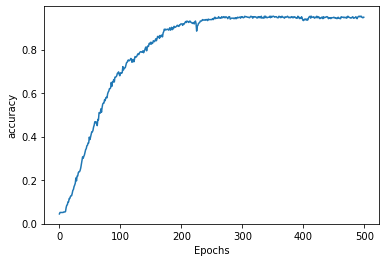

In [15]:
plot_graphs(history, 'accuracy')


In [16]:
seed_text = "Laurence went to dublin" # 입력값
next_words = 100 # 입력값 다음 100개의 단어가 뭘지 물어보겠다
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0] # 시퀀스. 여기서 Laurence는 토커나이저에 없는 단어라 0으로 처리되며 went, to, dublin만 토큰화 되어 [134 13 59]가 나온다. 
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre') # 패딩. [0 0 0 0 0 0 0 134 13 59]로 변한다.
	# 모델을 훈련시킬 때 입력값으로 패딩 처리한 시퀀스를 넣었으니 seed_text역시 같은 과정을 거쳐야한다. 
	predicted = model.predict_classes(token_list, verbose=0) # 다음 단어 예측. 예측한 단어가 또다시 다음 단어를 예측하고...무한 반복이다. 
	output_word = ""
	for word, index in tokenizer.word_index.items(): # 예측한 토큰과 일치하는 단어 찾기
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word # 예측한 단어를 seed_text에 더하기
print(seed_text) # 처음엔 좋은데 문장이 길어질수록 조합이 이상해짐.(예측의 퀄리티가 떨어짐) 입력받은 데이터를 기준으로 판단한거기 때문에 어쩔 수 없음
# 이게 seed_text의 초기값 "Laurence went to dublin"은 100% 정확도(내가 원했던 값)를 보이지만 이를 기반으로 다음 단어를 예측하는 순간 정확도는 100%에서 떨어지게 된다. 90% 원했던 단어라고 하자.
# 그럼 그 다음 에측한 단어는 90% 단어를 기준으로 또 예측하는건데 90% 단어를 기준으로 선택한 것이니 내가 원하는 단어랑 더 멀어지겠지? 90% * XX% 만큼 원하는 단어가 두번 째 예측 단어로 선택되는 것이다. 이게 계속 반복되고...
# 원래 문장에서 멀어질수록 단어 조합이 이상할 수 밖에 없다. 

Laurence went to dublin and little as plenty as water water water red ball ball mavrone a rose mchugh rose arrived mchugh end again lanigans ball ball ball ball ball ball steps ball ball rose lanigans ball ball ball as finnertys rose mchugh hoops hoops hoops swore round further glisten swore round further rows ball were round milliner hall me merry as as red as a rose rose rose rose nonsense glisten nonsense their mchugh call mchugh glisten swore as water water forget how a hall a lanigan mchugh mchugh painted painted painted painted terrible call murther mchugh mchugh mchugh forget were groups entangled
